In [ ]:
import matplotlib.pyplot as plt
import numpy as np

d = np.arange(0, 5, 0.05)
f = 100*np.exp(-d*3)
plt.plot(d, f, label='f(x) = exp(x)')
plt.xlabel('distance')
plt.ylabel('v. linear')
plt.title('Exponential Growth')
plt.legend()



In [ ]:
#2D graph
from matplotlib import cm
d = np.arange(0, 9, 0.05)
lin_strength = 100
decay = 3
f = lin_strength*np.exp(-decay*d)

max_angle = np.pi/2
angle = np.arange(-np.pi/2, np.pi/2, np.pi/180)
g = (max_angle - np.abs(angle))/max_angle
X, Y = np.meshgrid(d, angle)
Z = X*Y

# Plot the surface
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, Z, vmin=Z.min() * 2, cmap=cm.Blues)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

plt.show()


In [ ]:
import bagpy
from bagpy import bagreader
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd

# === PARAMETRI ===
bag_file = '/home/braingear/anna_ws/solo_repulsori_profilo3/2025-07-01-18-01-26.bag'
odom_topic = '/odometry/filtered'
pgm_map = '/home/braingear/anna_ws/map.pgm'
resolution = 0.025
origin = [-9.7, 2.7] #asse x verticale, asse y orizzontale   pos iniziale robot [-11.7, 2.4]
invert_y = True
invert_x = True

# === LEGGI DATI CON BAGPY ===
b = bagreader(bag_file)
csvfile_odom = b.message_by_topic(odom_topic)
csvfile_goal = b.message_by_topic('/goal')

# Legge il CSV
dfodom = pd.read_csv(csvfile_odom)
# Tipicamente le colonne si chiamano pose.pose.position.x e pose.pose.position.y
x_vals = dfodom['pose.pose.position.x'].values
y_vals = dfodom['pose.pose.position.y'].values

dfgoal = pd.read_csv(csvfile_goal)
x_goal = dfgoal['pose.position.x'].values
y_goal = dfgoal['pose.position.y'].values

# === CARICA MAPPA ===
map_img = cv2.imread(pgm_map, cv2.IMREAD_GRAYSCALE)

# === CONVERSIONE COORDINATE ===
def world_to_map_coords(x_world, y_world):
    mx = int((x_world - origin[0]) / resolution)
    my = int((y_world - origin[1]) / resolution)
    if invert_y:
        my = map_img.shape[0] - my
    if invert_x:
        mx = map_img.shape[1] - mx
    return my, mx

path_pixels = np.array([world_to_map_coords(x, y) for x, y in zip(x_vals, y_vals)])
goal_points = np.array([world_to_map_coords(x, y) for x,y in zip(x_goal, y_goal)])
origin_world = world_to_map_coords(origin[0], origin[1])
path_pixels = path_pixels[::-1]
goal_points = goal_points[::-1]
# === PLOT ===
plt.figure(figsize=(10,10))
plt.imshow(map_img, cmap='gray')
plt.plot(path_pixels[:,0], path_pixels[:,1], color='red', linewidth=2, label="path solo repulsori")
plt.plot(goal_points[:,0], goal_points[:,1], 'go', markersize=10, label='Goals')
plt.plot(589, 348, 'bo', markersize=10, label='Start Position')
plt.title('Percorso odometria su mappa')
plt.legend()
plt.show()





In [ ]:
time = pd.to_datetime(df['header.stamp.secs']).astype(np.int64)
time -= time.iloc[0]  # parte da zero

# Estrai le velocità
v_x = df['twist.twist.linear.x']
w_z = df['twist.twist.angular.z']

# Plot velocità nel tempo
plt.figure(figsize=(12, 5))
plt.subplot(2,1,1)
plt.plot(time, v_x, label='Velocità lineare X (m/s)', color='blue')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocità lineare X')
plt.legend()

plt.subplot(2,1,2)
plt.plot(time, w_z, label='Velocità angolare Z (rad/s)', color='green')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocità angolare Z')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(12,6))
plt.boxplot([v_x, np.abs(w_z)], labels=['Linear X', 'Angular Z'])
plt.title('Boxplot velocità')
plt.ylabel('Valore')
plt.show()


In [ ]:
alpha = 0.8
sigma = 1.57
d = 2.3
d_safe = 0.5
s = np.cos(alpha)*np.sin(alpha)
lambda_ = 10*np.exp(-(d-d_safe)/0.7)
lambda_max = 10*np.exp(-(-d_safe)/0.7)
m = np.exp(-(alpha*alpha)/(2*sigma*sigma))

ang_vel = s*m*lambda_

print(f"m calcolato: {m:.4f}")
print(f"Lambda calcolato: {lambda_:.4f} m/s")
print(f"Velocità angolare calcolata: {ang_vel:.4f} rad/s")

vel_max = s*m*lambda_max
print(f"Velocità massima calcolata: {vel_max:.4f} m/s")

ang_vel_n = (2 * ((ang_vel - (-vel_max)) / (2 * vel_max)) - 1.0)
print(f"Velocità angolare normalizzata (-1,1): {ang_vel_n:.4f} rad/s")

In [ ]:
sigma = 1.57
d = 2.3
d_safe = 0.5
lambda_max = 10*np.exp(-(-d_safe)/0.7)
f = 0
for alpha in np.arange(0.0, 2*np.pi, np.pi/360):
    m = np.cos(alpha)*np.sin(alpha)*np.exp(-(alpha*alpha)/(2*sigma*sigma))
    f += np.abs(m)

vel_max = f*lambda_max
print(vel_max)


In [20]:
import numpy as np
import matplotlib.pyplot as plt

alphas = [np.arange(-np.pi/2, 0, np.pi/180)]
vel_max = 1
sigma = 2*np.pi/3
beta = np.pi/4
q = np.exp(-(beta*beta)/(2*sigma*sigma))
all = []
for alpha in alphas:
    m = np.cos(alpha)*np.sin(alpha)*np.exp(-(alpha*alpha)/(2*sigma*sigma))
    all.append(m)
all = np.array(all)
#all.squeeze()
v_ = np.array(all) * vel_max * 2/(q*len(alphas))
print(v_)

[[-9.91749201e-17 -2.84386799e-02 -5.71931331e-02 -8.62249354e-02
  -1.15494791e-01 -1.44962593e-01 -1.74587479e-01 -2.04327897e-01
  -2.34141668e-01 -2.63986053e-01 -2.93817819e-01 -3.23593307e-01
  -3.53268506e-01 -3.82799121e-01 -4.12140649e-01 -4.41248451e-01
  -4.70077829e-01 -4.98584098e-01 -5.26722668e-01 -5.54449116e-01
  -5.81719265e-01 -6.08489263e-01 -6.34715658e-01 -6.60355477e-01
  -6.85366304e-01 -7.09706354e-01 -7.33334553e-01 -7.56210611e-01
  -7.78295097e-01 -7.99549515e-01 -8.19936373e-01 -8.39419257e-01
  -8.57962902e-01 -8.75533256e-01 -8.92097552e-01 -9.07624367e-01
  -9.22083690e-01 -9.35446978e-01 -9.47687218e-01 -9.58778981e-01
  -9.68698475e-01 -9.77423597e-01 -9.84933981e-01 -9.91211040e-01
  -9.96238013e-01 -1.00000000e+00 -1.00248400e+00 -1.00367894e+00
  -1.00357571e+00 -1.00216719e+00 -9.99448265e-01 -9.95415840e-01
  -9.90068872e-01 -9.83408370e-01 -9.75437403e-01 -9.66161110e-01
  -9.55586693e-01 -9.43723421e-01 -9.30582618e-01 -9.16177655e-01
  -9.00523

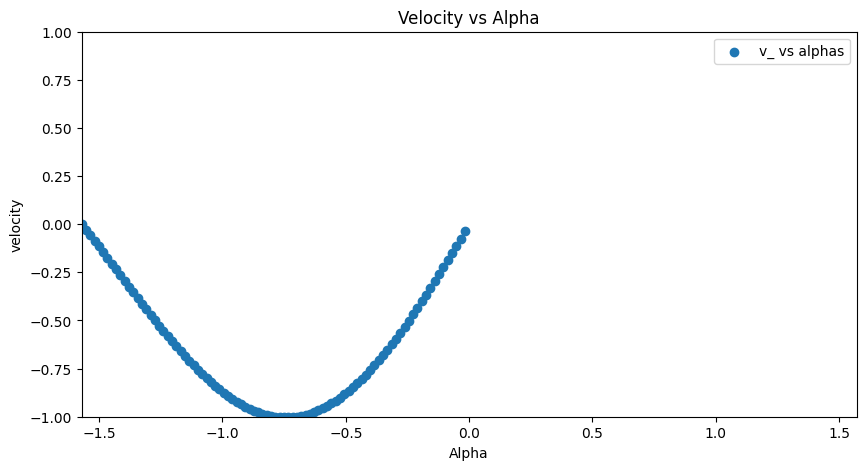

In [21]:
#plot alphas
plt.figure(figsize=(10, 5))
plt.scatter(alphas[0], v_[0], label='v_ vs alphas')
plt.xlabel('Alpha')
plt.ylabel('velocity')
plt.title('Velocity vs Alpha')
plt.xlim(-np.pi/2, np.pi/2)
plt.ylim(-vel_max, vel_max)
plt.legend()
plt.show()

In [22]:
np.sum(v_)/ len(alphas[0])

np.float64(-0.6293608973451088)

omega_R: [-1.53667233 -1.53667233 -1.53667233 -1.53667233 -1.53667233 -1.53667233
 -1.53667233 -1.53667233 -1.53667233 -1.53667233 -1.53667233 -1.46172794
 -1.39043862 -1.32262613 -1.25812089 -1.19676161 -1.13839486 -1.08287469
 -1.03006227 -0.97982554 -0.93203888 -0.88658281 -0.84334366 -0.8022133
 -0.7630889  -0.72587261 -0.69047139 -0.6567967  -0.62476435 -0.59429423
 -0.56531016 -0.53773966 -0.51151378 -0.48656696 -0.46283681 -0.44026399
 -0.41879207 -0.39836734 -0.37893873 -0.36045767 -0.34287794 -0.32615559
 -0.31024879 -0.29511778 -0.28072472 -0.26703361 -0.25401023 -0.241622
 -0.22983796 -0.21862863 -0.20796599 -0.19782336 -0.18817541 -0.17899798
 -0.17026815 -0.16196407 -0.15406499 -0.14655115 -0.13940377 -0.13260497
 -0.12613775]
-0.12613774615771256


/tmp/ipykernel_12586/3211558780.py:106: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


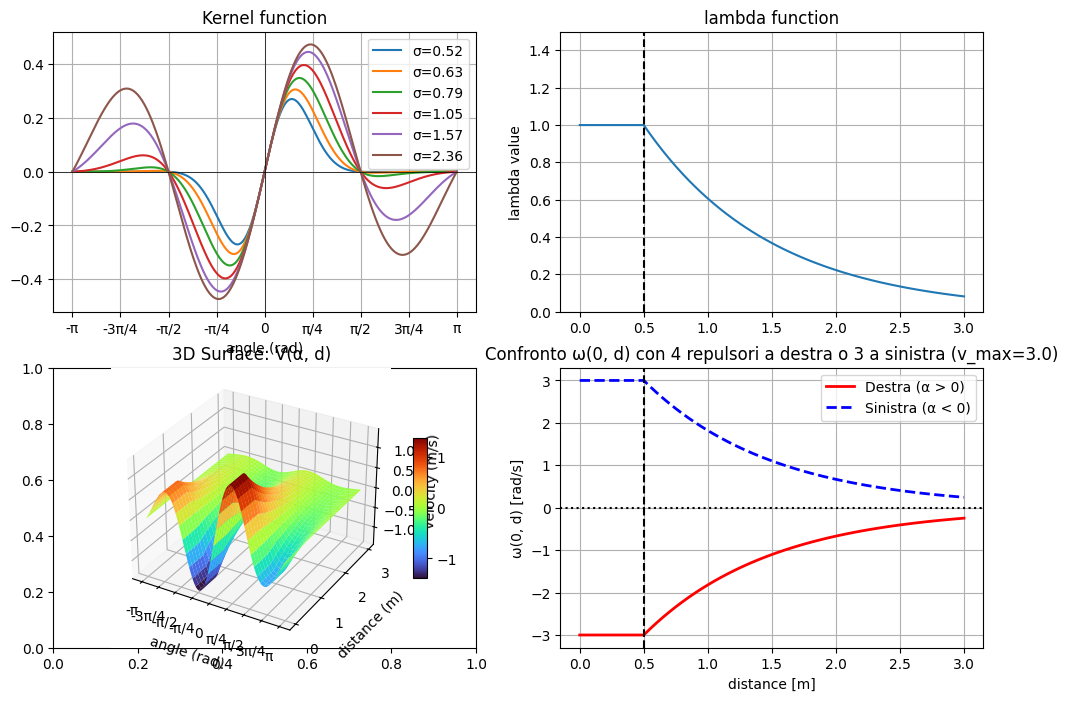

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parametri iniziali
alpha = np.linspace(-np.pi, np.pi, 360)
distance = np.arange(0, 3.05, 0.05)  # fino a 3 incluso
sigma = [np.pi/6, np.pi/5, np.pi/4, np.pi/3, np.pi/2, 3*np.pi/4]
decay = 1.0
sigma0 = 2.0
sign = -1

max_velocity = 3.0
min_distance = 0.5


alpha0 = 0  # angolo fisso

# Scenario: 4 repulsori a destra
repellers_R = np.linspace(np.pi/8, 3*np.pi/8, 4)

omega_R = np.zeros_like(distance)

for ar in repellers_R:
    omega_R += sign*lambda_func(distance, min_distance, decay) * kernel(ar, sigma0)


# Normalizza
print("omega_R:", omega_R)
print(np.max(omega_R))
omega_R = max_velocity * omega_R / np.max(np.abs(omega_R))

# 3 repulsori a sinistra (angoli negativi)
repellers_L = np.linspace(-np.pi/2, -np.pi/8, 3)
omega_L = np.zeros_like(distance)

for ar in repellers_L:
    omega_L += lambda_func(distance, min_distance, decay) * kernel(alpha0 - ar, sigma0)


# Normalizza
omega_L = max_velocity * omega_L / np.max(np.abs(omega_L))

# ---------------------------------------------------
# Plot

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Subplot 1: kernel function con diversi sigma
ax = axs[0, 0]
for s in sigma:
    ax.plot(alpha, kernel(alpha, s), label=f'σ={s:.2f}')
ax.axhline(0, color='k', linewidth=0.5)
ax.axvline(0, color='k', linewidth=0.5)
ax.set_xticks([-np.pi, -3*np.pi/4, -np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi])
ax.set_xticklabels(['-π', '-3π/4', '-π/2', '-π/4', '0',  'π/4','π/2', '3π/4', 'π'])
ax.set_title("Kernel function")
ax.set_xlabel('angle (rad)')
ax.grid(True)
ax.legend()

# Subplot 2: lambda function
ax = axs[0, 1]
ax.plot(distance, lambda_func(distance, min_distance, decay))
ax.set_ylim([0, 1.5])
ax.axvline(min_distance, color='k', linestyle='--')
ax.set_title("lambda function")
ax.set_ylabel('lambda value')
ax.grid(True)

# Subplot 3: Surface 3D plot
from mpl_toolkits.mplot3d import Axes3D  # necessario per 3D
ax = fig.add_subplot(2, 2, 3, projection='3d')

AA, DD = np.meshgrid(alpha, distance)
KK = kernel(AA, sigma0)
LL = lambda_func(DD, min_distance, decay)
VV = max_velocity * KK * LL

surf = ax.plot_surface(AA, DD, VV, cmap='turbo', linewidth=0, antialiased=True)
ax.set_xlabel('angle (rad)')
ax.set_ylabel('distance (m)')
ax.set_zlabel('velocity (m/s)')
ax.set_title('3D Surface: V(α, d)')
ax.set_xticks([-np.pi, -3*np.pi/4, -np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi])
ax.set_xticklabels(['-π', '-3π/4', '-π/2', '-π/4', '0',  'π/4','π/2', '3π/4', 'π'])
fig.colorbar(surf, shrink=0.5, aspect=10)

# Subplot 4: confronto omega
ax = axs[1, 1]
ax.plot(distance, omega_R, 'r-', linewidth=2, label='Destra (α > 0)')
ax.plot(distance, omega_L, 'b--', linewidth=2, label='Sinistra (α < 0)')
ax.axhline(0, color='k', linestyle=':')
ax.axvline(min_distance, color='k', linestyle='--')
ax.set_xlabel('distance [m]')
ax.set_ylabel('ω(0, d) [rad/s]')
ax.set_title('Confronto ω(0, d) con 4 repulsori a destra o 3 a sinistra (v_max=3.0)')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()


In [164]:
vel_max_q = 3
sigma = 2*np.pi/3
strength = vel_max_q/kernel(np.pi/4, sigma)
d1 = 1.7
d2 = 1
d3 = 0.5
min_distance = 0.5
decay = 0.7

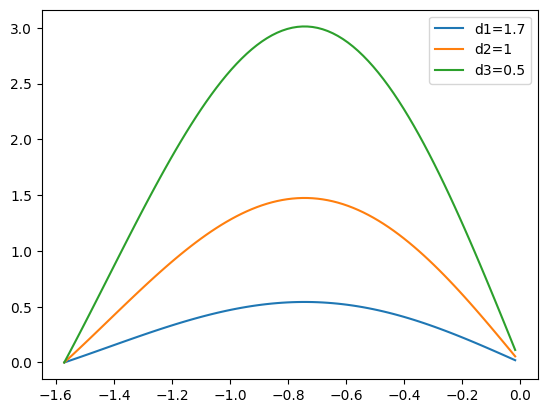

In [165]:
alphas = np.arange(-np.pi/2, 0, np.pi/180)
w1 = sign*lambda_func(d1, min_distance, decay)*kernel(alphas, sigma)*strength
w2 = sign*lambda_func(d2, min_distance, decay)*kernel(alphas, sigma)*strength
w3 = sign*lambda_func(d3, min_distance, decay)*kernel(alphas, sigma)*strength
plt.plot(alphas, w1, label='d1=1.7')
plt.plot(alphas, w2, label='d2=1')
plt.plot(alphas, w3, label='d3=0.5')
plt.legend()

In [136]:
sum_w1 = np.sum(w1)
sum_w2 = np.sum(w2)
sum_w3 = np.sum(w3)
print(sum_w1)
print(sum_w2)
print(sum_w3)

30.602625978165495
83.18656209957601
169.9274422831794


In [ ]:
aa = [np.pi/4, np.pi/3]

v = 0
for a in aa:
    v += sign*lambda_func(d1, min_distance, decay)*kernel(a, sigma)*strength

v_att = lambda_func(d1, min_distance, decay)*kernel(np.pi/4, sigma)*strength

print(v)
print(v_att)
v+v_att
#proposta 1: la velocità massima è quella in pi/4 a d=dmin.. non ha molto senso perche poi la somma dei vari contributi ti porta ad avere valori alti o comunque non sono così facili da controllare

-0.9832696478662395
0.540276936443857


np.float64(-0.4429927114223825)

In [ ]:
vel_max_ang = 0.1 #scelta da me
sign = -1
sigma = np.pi
alphas = np.arange(-np.pi/2, 0, np.pi/180)
epsilon = 0

strength_rep = vel_max_ang/(sign*(kernel(-np.pi/4, sigma))) #tale velocità angolare massima è data dai contributi provenienti da q1 e q2
strength_att = (vel_max_ang-epsilon)/kernel(np.pi/4, sigma)

print("strength rep: ", strength_rep, "att: ",strength_att  )

a = -np.pi/4
v1 = sign*lambda_func(min_distance, min_distance, decay)*kernel(a, sigma)*strength_rep

b = np.pi/3
v2 = lambda_func(min_distance, min_distance, decay)*kernel(b, sigma)*strength_att

c = np.pi/2
v3 = sign*lambda_func(min_distance, min_distance, decay)*kernel(c, sigma)*strength_rep


print(v1+v2+v3)
#perc = 1/(eps+np.abs(a-b))
#v_att = v_att-(v_att*perc/100)
np.min([1, v1+v2+v3])

#proposta 2: setto una vel max del quadrante equivalente alla velocità con quadrante pieno a d=dmin. 
#in questo modo la velocità finale so che varia tra -6 e 6 sempre in ogni quadrante. 
#il rapporto atttr-repulsori è 1:1. 
#si dovrebbe moltiplicare l'attrattore per un numero x e poi togliere potenza man mano che repulsori si aggiungono al suo stesso quadrante

strength rep:  0.20634868149982052 att:  0.20634868149982052
[1.11505360e-17 3.18642520e-03 6.38638873e-03 9.59573531e-03
 1.28102751e-02 1.60257897e-02 1.92380376e-02 2.24427609e-02
 2.56356907e-02 2.88125536e-02 3.19690775e-02 3.51009982e-02
 3.82040651e-02 4.12740475e-02 4.43067410e-02 4.72979734e-02
 5.02436111e-02 5.31395649e-02 5.59817963e-02 5.87663232e-02
 6.14892265e-02 6.41466554e-02 6.67348332e-02 6.92500636e-02
 7.16887356e-02 7.40473296e-02 7.63224224e-02 7.85106929e-02
 8.06089267e-02 8.26140216e-02 8.45229922e-02 8.63329747e-02
 8.80412314e-02 8.96451550e-02 9.11422729e-02 9.25302512e-02
 9.38068983e-02 9.49701688e-02 9.60181666e-02 9.69491484e-02
 9.77615263e-02 9.84538707e-02 9.90249131e-02 9.94735479e-02
 9.97988347e-02 1.00000000e-01 1.00076439e-01 1.00027717e-01
 9.98535686e-02 9.95539026e-02 9.91287982e-02 9.85785078e-02
 9.79034564e-02 9.71042411e-02 9.61816312e-02 9.51365672e-02
 9.39701595e-02 9.26836877e-02 9.12785987e-02 8.97565053e-02
 8.81191839e-02 8.636857

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [ ]:
#proposta 3:
# decido che la velocità max del quadrante è vel_max_q e si raggiunge a d=dmin in pi/4
#per ogni quadrante estraggo il valore massimo dei repulsori e degli attrattori e mi assicuo che con tale valore la sedia riesca a sfuggire propriamente
#oi sommo attr e repulsore
#in questo modo la relazione è 1:1 e in campo ho al più 4 rep e 1 attr e in un singolo quadrante ho 1 e 1.
#a questo punto posso effettivamente decidere la finale relazione attr-rep ad esempio 0.9:1 ...


In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:

# Funzioni kernel e lambda
def kernel(a, s):
    return np.sin(a) * np.cos(a) * np.exp(- (a**2) / (2 * s**2))

def lambda_func(d, dmin, decay):
    return np.where(d < dmin, 1, np.exp(- (d - dmin) / decay))

In [5]:
def setKmax(kmax_points, t_rad=np.pi/180, sigma=2*np.pi/3):
        
        step = (90/5)*t_rad
        kMax = 0
        kPoints = []
        pt = None
        for i in np.arange(-np.pi/2, 0, step): #avanza di step gradi
            max_k = 0
            
            for j in np.arange(0, step, t_rad):    #avanza di 1 grado 
                k = np.abs(kernel(i+j, sigma))
                if k > max_k:
                    max_k = k
                    pt = i+j
            
            kPoints.append(pt)
            kMax+= max_k


        kmax_points.append(kPoints)
        kPoints = []

        for i in np.arange(np.pi/2, np.pi, step):
            max_k = 0
            for j in np.arange(0, step, t_rad):
                k = np.abs(kernel(i+j, sigma))
                if k > max_k:
                    max_k = k
                    pt = i+j

            kPoints.append(pt)    
            kMax += max_k


        kmax_points.append(kPoints)
        return kMax


In [6]:
points = []
sigma=2*np.pi/3
kmax = setKmax(points, np.pi/180, sigma)



In [54]:
k_=0
for q in points:
    for pt in q:
        k_ += np.abs(kernel(pt, sigma))

print(k_)

2.9536144560980113


In [74]:
6 < np.inf

True

In [71]:
#crea un vettore di 360 distanze random comprese tra 0.5 e 3 e con qualche valore a +infinito

polar_map = np.array([random.uniform(0.5, 3) for x in range(0, 360)])
t_rad=np.pi/180
step = 90/5
for i in np.arange(0, len(polar_map), step): 
            min_dist = np.inf
            index = 0
            for j in np.arange(step):
            
                d = polar_map[int(i+j)]
                if d <= min_dist:
                    if kernel(i+j, sigma) < kernel(index, sigma):
                     
                        continue
                  
                    min_dist = d
                    index = i+j

0.0
ok
1.0
2.0
skip
3.0
skip
4.0
ok
5.0
skip
6.0
skip
7.0
8.0
skip
9.0
skip
10.0
skip
11.0
skip
12.0
skip
13.0
skip
14.0
skip
15.0
skip
16.0
skip
17.0
skip
0.0
skip
1.0
ok
2.0
3.0
skip
4.0
skip
5.0
skip
6.0
7.0
skip
8.0
skip
9.0
10.0
skip
11.0
skip
12.0
skip
13.0
skip
14.0
skip
15.0
skip
16.0
17.0
skip
0.0
ok
1.0
skip
2.0
3.0
4.0
skip
5.0
skip
6.0
7.0
8.0
skip
9.0
10.0
11.0
12.0
13.0
skip
14.0
skip
15.0
skip
16.0
skip
17.0
0.0
ok
1.0
skip
2.0
skip
3.0
skip
4.0
skip
5.0
6.0
skip
7.0
8.0
9.0
skip
10.0
skip
11.0
skip
12.0
skip
13.0
14.0
skip
15.0
16.0
skip
17.0
0.0
skip
1.0
ok
2.0
skip
3.0
skip
4.0
5.0
6.0
skip
7.0
8.0
9.0
10.0
skip
11.0
skip
12.0
skip
13.0
14.0
15.0
16.0
skip
17.0
skip
0.0
ok
1.0
ok
2.0
3.0
4.0
5.0
ok
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
0.0
ok
1.0
ok
2.0
ok
3.0
ok
4.0
ok
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
ok
14.0
15.0
16.0
17.0
0.0
ok
1.0
ok
2.0
3.0
ok
4.0
ok
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
0.0
ok
1.0
2.0
ok
3.0
ok
4.0

In [1]:
def setKmax():
        t_rad = np.pi/180
        step = (360/20)*t_rad
        kMax = []
        for i in np.arange(0, np.pi/2, step): 
            max_k = 0
            for j in np.arange(0, step, t_rad):    
                k = np.abs(kernel(i+j, sigma))
                if k > max_k:
                    max_k = k
            
                
            kMax.append( max_k)

        for i in np.arange(-np.pi, -np.pi/2, step):
            
            max_k = 0
            for j in np.arange(0, step, t_rad):
                
                k = np.abs(kernel(i+j, sigma))
                if k > max_k:
                    max_k = k
                
            kMax.append(max_k)

        return kMax
#trovare i punti max di ogni quadrnte
#trovare kmax


In [350]:
alphas = setKmax()
alphas = np.array(alphas)
d = [0.5, 0.5, 0.5, 0.5, 0.5]


v_ = 0
for i in np.arange(len(alphas)):
    m = kernel(alphas[i], sigma)*lambda_func(d[i], min_distance, decay)*-1
    v_+=(m)*20/(2*setKmax())

v_

IndexError: list index out of range

In [ ]:
def setVelocity():
    omega_rep = 0
    for obj in ap_field:
        v = obj[2]*lambda_func(obj[1], min_distance, decay)*kernel(obj[0], sigma)
        v = (v*2*nsett)/kmax
        omega_rep+=v

    omega_attr = 0
    if(new_goal):
        omega_attr = lambda_func(obj[1], min_distance, decay)*kernel(obj[0], sigma)
        omega_attr = (delta*omega_attr*2*nsett)/kmax

    omega = omega_rep + omega_attr
    return omega
